# Prophet results

_This notebook contains all the obtained results. For their imlplementation please refer to the prophet notebook itself. Furthermore please make sure to install ipynb by running:_ `pip install ipynb`


In [39]:
from ipynb.fs.defs.prophet import runExperiment
import matplotlib.pyplot as plt
from statistics import mean
from numpy import load, save
import dataframe_image as dfi

In [41]:
#Plotting the results for 50k experiments

arrivalPositionsChosenFairPA, a_50k_uniform = runExperiment(algorithm="FairGeneralProphet", N_experimentReps=50000, 
                                                distribution_type="uniform", n_candidates=50)
    
arrivalPositionsChosenFairIID, b_50k_uniform = runExperiment(algorithm="FairIIDProphet", N_experimentReps=50000, 
                                                distribution_type="uniform", n_candidates=50)
    
arrivalPositionsChosenSC, c_50k_uniform = runExperiment(algorithm="SC", N_experimentReps=50000, 
                                                distribution_type="uniform", n_candidates=50)
    
arrivalPositionsChosenEHKS, d_50k_uniform = runExperiment(algorithm="EHKS", N_experimentReps=50000, 
                                                distribution_type="uniform", n_candidates=50)

arrivalPositionsChosenCFHOV, e_50k_uniform = runExperiment(algorithm="CFHOV", N_experimentReps=50000, 
                                                distribution_type="uniform", n_candidates=50)

# arrivalPositionsChosenDP, f_50k_uniform = runExperiment(algorithm="DP", N_experimentReps=50000, 
#                                                 distribution_type="uniform", n_candidates=50)
plt.subplots_adjust(bottom=0.25)
plt.rcParams["figure.figsize"] = (8,3)
plt.rcParams.update({'font.size': 14})
plt.plot(range(0,50), arrivalPositionsChosenFairPA, label="Fair PA")
plt.plot(range(0,50), arrivalPositionsChosenFairIID, label="Fair IID")
plt.plot(range(0,50), arrivalPositionsChosenSC, label="SC")
plt.plot(range(0,50), arrivalPositionsChosenEHKS, label="EHKS")
# plt.plot(range(0,50), arrivalPositionsChosenDP, label="DP")
plt.plot(range(0,50), arrivalPositionsChosenCFHOV, label="CFHOV")

plt.grid(visible=True, linewidth=1)

# plt.title("50k experiments, discarding None results")
plt.xlabel("Arrival position")
plt.ylabel("Num Picked")
plt.rcParams.update({'font.size': 12})
plt.legend(loc="upper left", ncol=5)
plt.savefig("images/uniform_distribution/50kExperiments_uniform.png")

  0%|          | 0/50000 [00:00<?, ?it/s]


UnboundLocalError: local variable 'result' referenced before assignment

In [2]:
print("The average value of the chosen candidate in the uniform distribution: \n")
print("FairPA: ", round(mean(a),3), "(should be 0.501)")
print("FairIID: ", round(mean(b),3), "(should be 0.661)")
print("SK: ", round(mean(c),3), "(should be 0.499)")
print("EHKS: ", round(mean(d),3), "(should be 0.631)")
print("SP: ", round(mean(e),3), "(should be 0.751)")

The average value of the chosen candidate in the uniform distribution: 



NameError: name 'mean' is not defined

In [5]:
#Plotting the results for 100k experiments

arrivalPositionsChosenFairPA, a_100k_uniform = runExperiment(algorithm="FairGeneralProphet", N_experimentReps=50000*2, 
                                                distribution_type="uniform", n_candidates=50)
    
arrivalPositionsChosenFairIID, b_100k_uniform = runExperiment(algorithm="FairIIDProphet", N_experimentReps=50000*2, 
                                                distribution_type="uniform", n_candidates=50)
    
arrivalPositionsChosenSC, c_100k_uniform = runExperiment(algorithm="SC", N_experimentReps=50000*2, 
                                                distribution_type="uniform", n_candidates=50)
    
arrivalPositionsChosenEHKS, d_100k_uniform = runExperiment(algorithm="EHKS", N_experimentReps=50000*2, 
                                                distribution_type="uniform", n_candidates=50)

arrivalPositionsChosenDP, e_100k_uniform = runExperiment(algorithm="DP", N_experimentReps=50000*2, 
                                                distribution_type="uniform", n_candidates=50)

100%|██████████| 100000/100000 [02:59<00:00, 558.66it/s]


In [ ]:
print("The average value of the chosen candidate in the binomial distribution: \n")
print("FairPA: ", round(mean(a),3), "(should be 0.501)")
print("FairIID: ", round(mean(b),3), "(should be 0.661)")
print("SC: ", round(mean(c),3), "(should be 0.499)")
print("EHKS: ", round(mean(d),3), "(should be 0.631)")
print("SP: ", round(mean(e),3), "(should be 0.751)")

In [23]:
a_50k_binomial = load('data/FairPA_values.npy')
b_50k_binomial = load('data/FairIID_values.npy')
c_50k_binomial = load('data/SC_values.npy')
d_50k_binomial = load('data/EHKS_values.npy')

a_100k_binomial = load('data/FairPA_values100k.npy')
b_100k_binomial = load('data/FairIID_values100k.npy')
c_100k_binomial = load('data/SC_values100k.npy')
d_100k_binomial = load('data/EHKS_values100k.npy')

In [20]:
print("Original : The average value of the chosen candidate for our Algorithm 2 (Fair PA), our Algorithm 3 (Fair IID), SC, EHKS, CFHOV, and DP for the uniform distribution is 0.501, 0.661, 0.499, 0.631, 0.752, 0.751, while for the binomial distribution it is 298.34, 389.24, 277.63, 363.97, 430.08, 513.34, respectively.")
print("Uniform distribution (original, 50k, 100k):")

print("FairPA: 0.501, ", round(mean(a_50k_uniform),3), " , ", round(mean(a_100k_uniform),3))
print("FairIID: 0.661, ", round(mean(b_50k_uniform),3), " , ", round(mean(b_100k_uniform),3))
print("SC: 0.499, ", round(mean(c_50k_uniform),3), " , ", round(mean(c_100k_uniform),3))
print("EHKS: 0.631, ", round(mean(d_50k_uniform),3), " , ", round(mean(d_100k_uniform),3))

print("Binomial distribution:")
print("FairPA: 298.34, ", round(mean(a_50k_binomial),3), " , ", round(mean(a_100k_binomial),3))
print("FairIID: 389.24, ", round(mean(b_50k_binomial),3), " , ", round(mean(b_100k_binomial),3))
print("SC: 277.63, ", round(mean(c_50k_binomial),3), " , ", round(mean(c_100k_binomial),3))
print("EHKS: 363.97, ", round(mean(d_50k_binomial),3), " , ", round(mean(d_100k_binomial),3))

Original : The average value of the chosen candidate for our Algorithm 2 (Fair PA), our Algorithm 3 (Fair IID), SC, EHKS, CFHOV, and DP for the uniform distribution is 0.501, 0.661, 0.499, 0.631, 0.752, 0.751, while for the binomial distribution it is 298.34, 389.24, 277.63, 363.97, 430.08, 513.34, respectively.
Uniform distribution (original, 50k, 100k):
FairPA: 0.501,  0.494  ,  0.497
FairIID: 0.661,  0.66  ,  0.659
SC: 0.499,  0.495  ,  0.5
EHKS: 0.631,  0.63  ,  0.629
Binomial distribution:
FairPA: 298.34,  297  ,  299
FairIID: 389.24,  389  ,  389
SC: 277.63,  277  ,  279
EHKS: 363.97,  364  ,  363


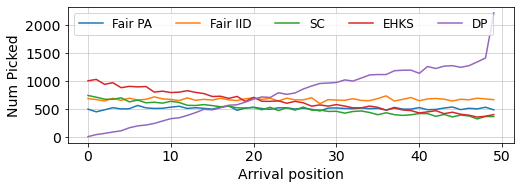

In [28]:
plt.subplots_adjust(bottom=0.25)
plt.rcParams["figure.figsize"] = (8,3)
plt.rcParams.update({'font.size': 14})
plt.plot(range(0,50), arrivalPositionsChosenFairPA, label="Fair PA")
plt.plot(range(0,50), arrivalPositionsChosenFairIID, label="Fair IID")
plt.plot(range(0,50), arrivalPositionsChosenSC, label="SC")
plt.plot(range(0,50), arrivalPositionsChosenEHKS, label="EHKS")
plt.plot(range(0,50), arrivalPositionsChosenDP, label="DP")
plt.grid(visible=True, linewidth=.5)
# plt.title("100k experiments, discarding None results")
plt.xlabel("Arrival position")
plt.ylabel("Num Picked")
plt.rcParams.update({'font.size': 12})
plt.legend(loc="upper left", ncol=5)
plt.savefig("images/uniform_distribution/100kExperiments_uniform.png")

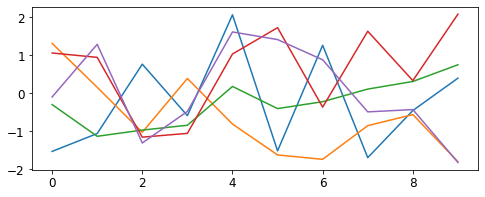

<Figure size 2160x1440 with 0 Axes>

In [6]:
#In order to save the legend
import pylab
fig = pylab.figure()
figlegend = pylab.figure(figsize=(30,20))
ax = fig.add_subplot(111)
lines = ax.plot(range(10), pylab.randn(10), range(10), pylab.randn(10),range(10), pylab.randn(10),range(10), pylab.randn(10),range(10), pylab.randn(10))
figlegend.legend(lines, ('Fair PA', 'Fair IID', 'SC', 'EHKS', "DP/CFHOV"), loc='center', ncol=5)
figlegend.savefig('images/legend.png')

In [7]:
print("The average value of the chosen candidate in the uniform distribution: \n")
print("FairPA: ", mean(a), "(should be 0.501)")
print("FairIID: ", mean(b), "(should be 0.661)")
print("SK: ", mean(c), "(should be 0.499)")
print("EHKS: ", mean(d), "(should be 0.631)")
print("SP: ", mean(e), "(should be 0.751)")

The average value of the chosen candidate in the uniform distribution: 

FairPA:  0.49687928146476945 (should be 0.501)
FairIID:  0.6581621703523608 (should be 0.661)
SK:  0.4947427444204486 (should be 0.499)
EHKS:  0.6305539838608503 (should be 0.631)
SP:  0.7525956502263643 (should be 0.751)


In [31]:
print("Uniform case, for FairPA")
print("Assuming CHHOV as the 'optimal, but unfair, online algorithm' :", mean(a_50k_uniform) / mean(e_50k_uniform) *100, "% \n")

print("Uniform case, for FairIID")
print("Assuming CFHOV as the 'optimal, but unfair, online algorithm' :", mean(b_50k_uniform) / mean(e_50k_uniform) *100, "% \n \n")

## TODO: Later on fix this for the binomial after figuring out DP/CFHOV confusion
# => IMPLEMENT WITH DP

print("Binomial case, for FairPA")
print("Assuming DP as the 'optimal, but unfair, online algorithm' :", mean(a) / mean(e) *100, "% \n")

print(" Uniform case, for FairIID")
print("Assuming DP as the 'optimal, but unfair, online algorithm' :", mean(b) / mean(e) *100, "%")



Uniform case, for FairPA
Assuming CHHOV as the 'optimal, but unfair, online algorithm' : 66.26619923082767 % 

Uniform case, for FairIID
Assuming CFHOV as the 'optimal, but unfair, online algorithm' : 87.27281668536826 % 
 

Binomial case, for FairPA


NameError: name 'a' is not defined

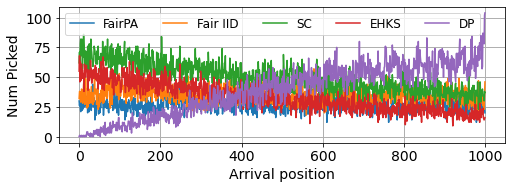

In [29]:
plt.subplots_adjust(bottom=0.25)
plt.rcParams["figure.figsize"] = (8,3)
plt.rcParams.update({'font.size': 14})

plt.plot(range(0,1000), load('data/FairPA_positions.npy'), label="FairPA")
plt.plot(range(0,1000), load('data/FairIID_positions.npy'), label="Fair IID")
plt.plot(range(0,1000), load('data/SC_positions.npy'), label="SC")
plt.plot(range(0,1000), load('data/EHKS_positions.npy'), label="EHKS")
plt.plot(range(0,1000), load('data/DP_positions.npy'), label="DP")
plt.grid(visible=True, linewidth=1)
plt.xlabel("Arrival position")
plt.ylabel("Num Picked")
# plt.title("Binomial distribution with 1k candidates, and 50k experiments")
plt.rcParams.update({'font.size': 12})
plt.legend(loc="upper left", ncol=5)
plt.savefig("images/binomial_distribution/50kExperiments_binomial.png")

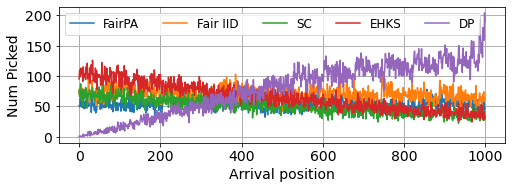

In [30]:
plt.subplots_adjust(bottom=0.25)
plt.rcParams["figure.figsize"] = (8,3)
plt.rcParams.update({'font.size': 14})
plt.plot(range(0,1000), load('data/FairPA_positions100k.npy'), label="FairPA")
plt.plot(range(0,1000), load('data/FairIID_positions100k.npy'), label="Fair IID")
plt.plot(range(0,1000), load('data/SC_positions100k.npy'), label="SC")
plt.plot(range(0,1000), load('data/EHKS_positions100k.npy'), label="EHKS")
plt.plot(range(0,1000), load('data/DP_positions100k.npy'), label="DP")
plt.grid(visible=True, linewidth=1)
plt.xlabel("Arrival position")
plt.ylabel("Num Picked")
# plt.title("Binomial distribution with 1k candidates, and 50k experiments")
plt.rcParams.update({'font.size': 12})
plt.legend(loc="upper left", ncol=5)
plt.savefig("images/binomial_distribution/100kExperiments_binomial.png")